# nmi | spring 2024
## demo 09 | homework 09 : shooting method, FDM
## your name here


##### 0701 c3.b) nonlinear shooting


apply shooting method to nonlinear BVP.
</br></br>

\begin{align}
  \left\{
    \begin{array}
      && y'' = 2e^{-2y}(1-t^2) \\
      & y(0) = 0 \\
      & y(1) = ln\,2
    \end{array}
  \right.
\end{align}
</br>

find bracketing interval $[s_0,s_1]$ and apply an equation solver to find and plot the solution.
</br></br>

true solution: $y(t) = ln(t^2 + 1)$.
</br>


###### code




0701 c3.b) iteration 16, s = [0.000061035,0.000076294]



,y_act,t1,y1,y1',t2,y2,y2'
0,0.00000000e+00,0.00000000,0.00000000e+00,0.00006104,0.00000000,0.00000000e+00,0.00007629
1,1.45519152e-09,0.00003052,2.79396772e-09,0.00012207,0.00003815,4.36557456e-09,0.00015259
2,1.76078159e-07,0.00033569,1.33179120e-07,0.00073242,0.00041962,2.08092368e-07,0.00091553
3,1.79292540e-05,0.00338745,1.16815116e-05,0.00683586,0.00423431,1.82523026e-05,0.00854477
4,1.79456226e-03,0.03390503,1.15095861e-03,0.06779309,0.04238129,1.79779187e-03,0.08468662
5,1.14994842e-01,0.32805548,1.02237680e-01,0.59242492,0.34909548,1.15025823e-01,0.62242679
6,5.23539382e-01,0.80433908,4.98939331e-01,0.97668049,0.82945255,5.23554829e-01,0.98269133
7,6.93147181e-01,1.00000000,6.93139843e-01,0.99992508,1.00000000,6.93149387e-01,0.99992231


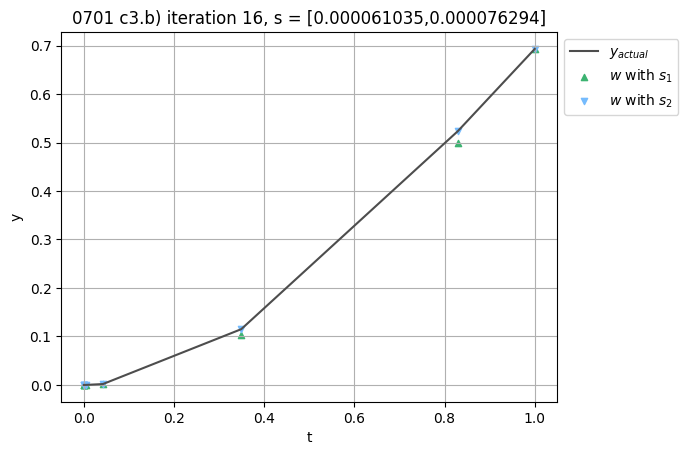

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():

  # solution
  yact = lambda t: np.log(pow(t,2)+1)

  # bvp
  bv = [0,np.log(2)]
  tt = [0,1]

  # ivp: f(t,y) = [y',y'']
  def ydot(t,y):
    dy = np.zeros_like(y)
    dy[0] = y[1] # y'
    dy[1] = 2*np.exp(-2*y[0])*(1-pow(t,2)) # 7.1.c3b, bvp y''
    return dy

  ic = np.array([0,bv[0]]) # zero is placeholder for s* - ie, [s*,bv[0]]
  tol = 1e-5 # error bound

  # bisection sorry lol
  s1 = -0.5 # this is the  left endpoint "a" of the interval [a,b]
  s2 = +0.5 # this is the right endpoint "b" of the interval [a,b]
  imax = 20 # max attempts at finding s* within interval [s1,s2]
  i = 0
  while (abs((s2-s1)/2) > tol) and (i<imax):
    ic = [bv[0],s1]
    sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    ic = [bv[0],s2]
    sol2 = sp.integrate.solve_ivp(ydot,tt,ic)

    size1 = sol1.t.size
    size2 = sol2.t.size
    err1 = bv[1] - sol1.y[0][size1-1] # error at s1 ~ a
    err2 = bv[1] - sol2.y[0][size2-1] # error at s2 ~ b
    if err1*err2 > 0 :
      print("choose different s1,s2")
      break
    #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

    sc = (s1+s2)/2 # midpoint between of [s1,s2] ~ [a,b]
    ic = [bv[0],sc]
    solc = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    sizec = solc.t.size
    errc = bv[1] - solc.y[0][sizec-1] # error at c
    if err1*errc < 0 :
      s2 = sc
      sol2 = solc
      size2 = sizec
      err2 = errc
    else:
      s1 = sc
      sol1 = solc
      size1 = sizec
      err1 = errc

    i += 1

  # dataframe, save last brackets
  ds = np.empty((max(size1,size2),1+3*2))
  ds[:] = np.nan # matplotlib ignores nan = good
  if size1 > size2:
    ds[0:size1,0] = yact(sol1.t)
    cx = "t1"
  else:
    ds[0:size2,0] = yact(sol2.t)
    cx = "t2"
  ds[0:size1,1] = sol1.t
  ds[0:size1,2] = sol1.y[0]
  ds[0:size1,3] = sol1.y[1]
  ds[0:size2,4] = sol2.t
  ds[0:size2,5] = sol2.y[0]
  ds[0:size2,6] = sol2.y[1]

  # dataframe, print some
  s_title = "0701 c3.b) iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
  if True: # spreadsheet
    display(df)
    print() # spacer

  # plot
  if True: # plot
    ax1  = df.plot(x=cx,y="y_act",label="$y_{actual}$",color="0.3")
    ax12 = df.plot(x="t2",y="y1",label="$w$ with $s_1$",ax=ax1,color="mediumseagreen",marker="^",kind="scatter")
    ax11 = df.plot(x="t2",y="y2",label="$w$ with $s_2$",ax=ax1,color="xkcd:sky blue",marker="v",kind="scatter")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.2,.8,1,2)) # narrow visible range of results (x_min,x_max,y_min,y_max)
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()



##### 0702 c3.b) nonlinear FDM


use FDM to approximate solutions to the same nonlinear boundary value problem for $n=9,19,39$.
</br></br>

\begin{align}
  \left\{
    \begin{array}
      && y'' = 2e^{-2y}(1-t^2) \\
      & y(0) = 0 \\
      & y(1) = ln\,2
    \end{array}
  \right.
\end{align}
</br>

plot approximate solution with exact solution and display errors as a function fof $t$ in a separate semilog plot.
</br>


centered difference formula 2nd derivative and $y''$ above gets you:
</br></br>

\begin{align}
  w_{i-1} - 2(w_i + h^2e^{-2w_i}(1 - t^2)) + w_{i+1} &= 0 \quad\text{at } t_i\\
  y_a - 2(w_1 + h^2e^{-2w_1}(1 - t^2)) + w_2 &= 0 \quad\text{at } t_a\\
  w_{n-1} - 2(w_n + h^2e^{-2w_n}(1 - t^2)) + y_b &= 0 \quad\text{at } t_b
\end{align}
</br>


###### code


iteration 0, error = 0.5547667697997086
iteration 1, error = 0.033566986375580324
iteration 2, error = 0.0006125569707043628
iteration 3, error = 7.342104458897065e-05


program 7.1 modified for question 0702 c3b, interior points n =3



<ipython-input-5-ac5c285e50c8>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a[i,i] = -2 + 2*pow(h,2)*(1-pow(th,2))/np.exp(2*w[i])


,t,y_act,"w,i=0","w,i=1","w,i=2","w,i=3","w,i=4"
0,0.00,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.25,0.06062462,0.00000000,0.06471361,0.06123619,0.06087233,0.06082593
2,0.50,0.22314355,0.00000000,0.24633802,0.23267910,0.23237618,0.23232880
3,0.75,0.44628710,0.00000000,0.49284470,0.46238023,0.46276891,0.46273740
4,1.00,0.69314718,0.69314718,0.69314718,0.69314718,0.69314718,0.69314718


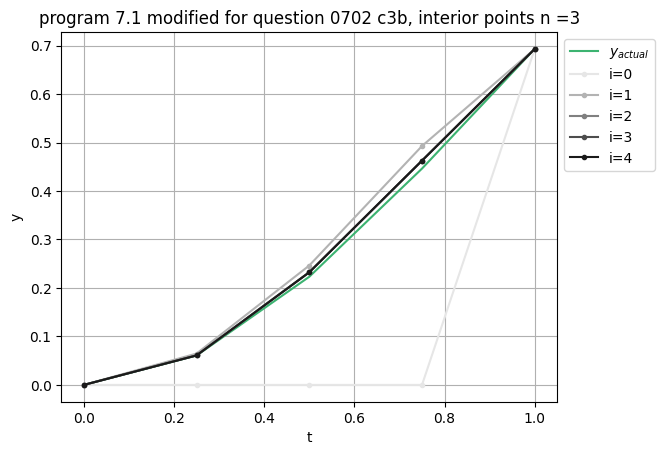

In [ ]:
# gimme sec, only had handwritten

def main():

  def f(w,t,bv,n):

    y = np.zeros((n,1)) # y=zeros(n,1) # excludes endpoints
    h = (t[1]-t[0])/(n+1)

    y[0]   = bv[0]  - 2*(w[0]   + pow(h,2)*(1-pow(t[0],2))/np.exp(2*w[0]))   + w[1]    # bc1 influence
    y[n-1] = w[n-2] - 2*(w[n-1] + pow(h,2)*(1-pow(t[1],2))/np.exp(2*w[n-1])) + bv[1]   # bc2 influence
    for i in range(1,n-1):
      th = t[0] + (i+1)*h
      y[i] = w[i-1] - 2*(w[i]   + pow(h,2)*(1-pow(th,2))/np.exp(2*w[i]))     + w[i+1]  # the rest

    return y # only intermediate

  def jac(w,t,bv,n):
    a = np.zeros((n,n))
    h = (t[1]-t[0])/(n+1)

    # bvp, diagonal = partial = -2 + 2*(h^2)*(1-t^2)/exp(2w[i])
    for i in range(n): # i=1:n
      th = t[0] + i*h
      a[i,i] = -2 + 2*pow(h,2)*(1-pow(th,2))/np.exp(2*w[i])

    # bvp, off-diag = 1 (for this bvp)
    for i in range(n-1): # i=1:n-1
      a[i,i+1] = a[i+1,i] =1

    return a

  # solution
  yact = lambda t: np.log(pow(t,2)+1)

  # newton multivariate

  tt,bv = [0,1],[0,np.log(2)]
  n = 3    # intermediate points
  h = (tt[1]-tt[0])/(n+1)
  imax = 4 # max iterations for multivariate

  w = np.zeros((n,1)) # initial guess of zeros
  s = np.zeros_like(w)

  # datastore
  ds = np.zeros((n+2,1+1+1*(imax+1)))    # t,y_act,w@(imax+1)
  # datastore, ic
  ds[0,:],ds[n+1,:] = bv[0],bv[1]        # w0, bv
  ds[:,0] = np.linspace(tt[0],tt[1],n+2) # t # after ws wrt ds[0,0],ds[n+1,0]
  ts = np.linspace(tt[0],tt[1],n+2)
  ys = np.zeros_like(ts)
  ys = yact(ts)
  ds[:,1] = ys

  for i in range(imax): # i=1:20 # lol its hardcode
    # w = w - w_n/w_d # newtons multivariate
    df = jac(w,tt,bv,n)
    mf = -f(w,tt,bv,n)
    s = np.linalg.solve(df,mf) # <~ heres the solver at work!
    print(f"iteration {i}, error = {np.linalg.norm(s)}")
    w += s
    ds[1:w.shape[0]+1,i+3] = w.flatten()

  # dataframe from datastore
  s_title = "program 7.1 modified for question 0702 c3b, interior points n =" + str(n)
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["t","y_act","w,i=0","w,i=1","w,i=2","w,i=3","w,i=4"])
  if True: # spreadsheet
    display(df)

  if True: # plot
    print() # spacer
    ax1  = df.plot(x="t",y="y_act",label="$y_{actual}$",color="mediumseagreen")
    ax11 = df.plot(x="t",y="w,i=0",label="i=0",ax=ax1,color=".9",marker=".")
    ax12 = df.plot(x="t",y="w,i=1",label="i=1",ax=ax1,color=".7",marker=".")
    ax13 = df.plot(x="t",y="w,i=2",label="i=2",ax=ax1,color=".5",marker=".")
    ax14 = df.plot(x="t",y="w,i=3",label="i=3",ax=ax1,color=".3",marker=".")
    ax15 = df.plot(x="t",y="w,i=4",label="i=4",ax=ax1,color=".1",marker=".")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.6,1,3.5,4.5))
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()

